## Optimization for Big Data

## Mirror Descent

### Kayané Robach

Some questions have been modified by myself thinking there was some typos in the homework.

## Summary

$D$ closed and convex $\subset$ $\mathbb{R}^p$.

$f$ a smooth and $C_1^L(\mathbb{R}^p,\mathbb{R}_+)$ function.

We consider the euclidean norm : $||x||$ = $\sqrt{\sum_{i=1}^p x_i^2}$ and the $L^1$ one : $|x|$ = $\sum_{i=1}^p |x_i|$.

In this homework, we are looking for $x^⋆ = \underset{x \in D}{argmin} f(x)$.

## Elementary facts

**Question 1.a** *Prove that when f is $\alpha$ strongly convex, a unique minimizer $x^⋆$ exists for f.*

To prove existance we need f to be strongly convex and coercive on a closed and convex set.

$f$ is $\alpha$ strongly convex which means by definition 1.6.1 that $g : x \rightarrowtail f(x) - \alpha ||x||^2$ is convex. $g$ is also differentiable since $f$ is differentiable, then by proposition 1.4.2 

$\forall$ $x, y \in D$ $$g(y) \geq g(x) + <\nabla g(x),y-x>$$

$$\iff f(y) - \alpha ||y||^2 \geq f(x) - \alpha ||x||^2 + <\nabla f(x) + 2 \alpha x,y-x>$$ 

$$\iff f(y) \geq \alpha ||y||^2 + <\nabla f(x) + 2 \alpha x,y-x> + f(x) - \alpha ||x||^2$$ 

By Cauchy Schwarz we have $||\nabla f(x) + 2 \alpha x|| ||y-x|| \geq$ $<\nabla f(x) + 2 \alpha x,y-x>$ $\geq - ||\nabla f(x) + 2 \alpha x|| ||y-x||$

So $$f(y) \geq \alpha ||y||^2 - ||\nabla f(x) + 2 \alpha x|| ||y-x|| + f(x) - \alpha ||x||^2$$

Therefore for a fixed $x$, $||y|| \longrightarrow + \infty \implies f(y) \longrightarrow + \infty$.

As a conclusion we get that there exists a minimizer of $f$ since $f$ is strongly convex and coercive on a convex set.

Is this minimizer unique ?

Assume that 2 distinct solutions exist. Let $x_1^⋆$ and $x_2^⋆$ $\in D$ such that $\nabla f(x_1^⋆) = \nabla f(x_2^⋆) = 0$. Since $f$ is L-smooth and $\alpha$ strongly convex on $\mathbb{R}^p$ by lemma 1.6.1 we have $\forall$ $x_1, x_2 \in D$ $<\nabla f(x_1) - \nabla f(x_2), x_1 - x_2> \geq \frac{\alpha L}{\alpha + L} ||x_1 - x_2|| + \frac{||\nabla f(x_1) - \nabla f(x_2)||^2}{\alpha + L}$. In particular for $x_1^⋆, x_2^⋆$ we get $0 \geq \frac{\alpha L}{\alpha + L} ||x_1^⋆ - x_2^⋆|| \implies ||x_1^⋆ - x_2^⋆|| = 0 \iff x_1^⋆ = x_2^⋆$ which is in contradiction with our assumption. Then we can conclude that when f is $\alpha$ strongly convex, it has a unique minimizer $x^⋆$.

**Question 1.b** *Prove that $x^⋆$ satisfies $\forall v \in D$ $<\nabla f(v), v − x^⋆ \geq 0$.*

We have that f is smooth and strongly convex, and so that there exists a unique minimizer $x^⋆$, we have by the FOC that $\nabla f(x^⋆) = 0$. Moreover, for $\forall v \geq x^⋆, \nabla f(v) > 0$, so that $<\nabla f(v), v − x^⋆ \geq 0$. Likewise, $\forall v \leq x^⋆, \nabla f(v) < 0$ and $<\nabla f(v), v − x^⋆ \geq 0$. Finally, $\forall v \in D$ $<\nabla f(v), v − x^⋆ \geq 0$.

**Question 2.a** *Recall the definition of the projection on D. Does this projection exists ? Why (we do not ask for a proof). Below, we will denote this projection by $\prod_D$.*

The projection on $D$ is defined $\forall x \in \mathbb{R}^p$ as $\prod_D(x)$ = $\underset{v \in D}{argmin} ||v - x||$. Since $\mathbb{R}^p$ with the euclidean norm is an Hilbert space and $D$ is a closed subspace of this Hilbert, we know by theorem of the orthogonal projection that $\prod_D$ exists.

**Question 2.b** *Consider the case $D = [a_1, b_1] × [a_2, b_2] × . . . × [a_p, b_p]$, where $a_i < b_i$ $\forall$ i. Compute $\prod_D(x)$.*

$D$ is an hypercube in $\mathbb{R}^p$, thus
$\forall i \in [|1,p|]$, $\prod_D(x)_i = \left\{
    \begin{array}{ll}
        a_i & \ \text{if} \  x_i < a_i \\
        x_i & \ \text{if} \ x_i \in [a_i,b_i] \\
        b_i & \ \text{if} \ x_i > b_i 
    \end{array}
\right.$

**Question 2.c** *For p′ an integer such that p′ ≤ p and a radius R > 0, consider the set $D = \{x \in \mathbb{R}^p : x^2_1 + . . . + x^2_p′ \leq R^2\}$. Compute $\prod_D(x)$.*

$D = \{x \in \mathbb{R}^p : x^2_1 + . . . + x^2_p′ \leq R^2\} = \{x \in \mathbb{R}^p : ||x||^2 \leq R^2\} = \bar{B}(0,R)$

$D$ is the closed and centered ball of radius R in $\mathbb{R}^p$, thus $\prod_D(x) = \frac{x}{max\{1, \frac{||x||}{R}\}}$.

Indeed, if $||x|| \leq R$ then $x \in D$ then $\prod_D(x) = x$. 

If $||x|| > R$ the closest point of $x$ in $D$ is $\frac{R x}{||x||}$ which has norm $R$. 

Therefore $\frac{||x||}{R} > 1 \iff ||x|| > R \implies \prod_D(x) = \frac{x}{max\{1, \frac{||x||}{R}\}} = \frac{R x}{||x||}$ and 

$\frac{||x||}{R} \leq 1 \iff ||x|| \leq R \implies \prod_D(x) = \frac{x}{max\{1, \frac{||x||}{R}\}} = x$

## Non-smooth domain

Define $S$ as the probability simplex :
$S = \{x \in \mathbb{R}^p : x_1 + x_2 + . . . + x_p = 1 \& \forall i \in \{1, . . . , p\} x_i \geq 0\}$.

$q$ : $x \in S$ $\rightarrowtail$ $\frac{1}{2} ||x - v||^2$.

**Question 3.a** *Define the projection on S as a constrained minimization problem. Below, we denote by w this projection.*

The constraints : $\sum_{i=1}^p x_i = 1$ and $x_i \geq 0$ $\forall i$ could be written as $x^T 1 - 1 = 0$ and $\forall i$ $x_i \geq 0$.

Therefore the minimization problem is the following : 

$\underset{x \in \mathbb{R}^p}{argmin} ||x - v||$ such that $x^T 1 - 1 = 0$ and $\forall i$ $x_i \geq 0$.

which is equivalent to 

$\underset{x \in \mathbb{R}^p}{argmin} \frac{1}{2}||x - v||^2$ such that $x^T 1 - 1 = 0$ and $\forall i$ $x_i \geq 0$


$\underset{x \in \mathbb{R}^p}{argmin}\ q(x)$ such that $x^T 1 - 1 = 0$ and $\forall i$ $x_i \geq 0$

**Question 3.b** *Prove that the Lagrangian function L associated to this minimization problem is :*

$$L(x, \zeta, \lambda) = \frac{1}{2} ||x - v||^2 + \lambda (\sum_{i=1}^p x_i - 1) - <\zeta , x>$$

*where $\lambda \in \mathbb{R}$ and $\zeta \in \mathbb{R}^p_+$. Give the relationship between the multipliers and $w$
with the help of the KKT conditions.*

$\underset{x \in \mathbb{R}^p}{argmin} \frac{1}{2}||x - v||^2$ such that $x^T 1 - 1 = 0$ and $\forall i$ $x_i \geq 0$.

The Lagrangian of the problem is then :

$$L(x,\lambda,\zeta) = \frac{1}{2}||x - v||^2 + \lambda (x^T 1 - 1) - \zeta^T x$$

We denote $w$ the solution $x$.

$$L(w,\lambda,\zeta) = \frac{1}{2}||w - v||^2 + \lambda (w^T 1 - 1) - \zeta^T w$$

where $\lambda \in \mathbb{R}$ and $\zeta \in \mathbb{R}^p$ are the Lagrangian multipliers.

The KKT necessary condition give :

$\forall i$ $- w_i \leq 0$ and $\zeta_i \geq 0$

$\sum_{i=1}^p w_i = 1$

$\forall i$ $\zeta_i w_i = 0$

$\forall i$ $\frac{\partial L(w,\lambda, \zeta)}{\partial w_i} = 0 \iff w_i - v_i + \lambda - \zeta_i = 0$

So :
- $w_i > 0$ $\implies$ $\zeta_i = 0$ and $w_i = v_i - \lambda > 0$
- $w_i = 0$ $\implies$ $\zeta_i \geq 0$ and $w_i = v_i - \lambda + \zeta_i = 0$ $\iff$ $- \zeta_i = v_i - \lambda \leq 0$.

**Question 3.c** *Assume that for two integers $(i, j) \in \{1, ... , p\}, v_i \geq v_j$ , prove that if w_i = 0, then w_j = 0.*

For $(i,j)$ two integers $\in {1,...,p}$, $v_i \geq v_j$, and $w_i = 0$ $\implies$ $\zeta_i \geq 0$ and $w_i = v_i - \lambda + \zeta_i = 0$.

Assume $w_j > 0$, this implies $\zeta_j = 0$ and $w_j = v_j - \lambda > 0$.

Then $v_i - \lambda \geq w_j = v_j - \lambda > 0$

$\iff - \zeta_i \geq w_j = v_j - \lambda > 0$ but since $\zeta_i \geq 0$ this leads to $0 \geq - \zeta_i \geq w_j = v_j - \lambda > 0$ which is impossible. Since then we made an error assuming $w_j > 0$ so $w_j = 0$.

**Question 3.d** *Prove that if $w_i$ > 0, then $\zeta_i$ = 0. 
Denote by I the set of "active coordinates" for the solution $w$ : $$I = \{i \in \{1, ..., p\} : w_i > 0\}$$ and $\rho = |I|$. Prove that if we rank $w$ by decreasing values : $$w_{(1)} \geq w_{(2)} \geq ... \geq w_{(\rho)} > w_{(\rho + 1)} = 0$$ then the same ranking also holds for coordinates in v for integers in $I$.*

*Deduce that : $$\lambda = \frac{\sum_{i=1}^{\rho} v_i - 1}{\rho}$$*

So, assume : $$w_{(1)} \geq w_{(2)} \geq w_{(3)} \geq ... \geq w_{(\rho)} > w_{(\rho + 1)} = 0$$

then $$v_{(1)} - \lambda \geq v_{(2)} - \lambda \geq v_{(3)} - \lambda  \geq ... \geq v_{(\rho)} - \lambda > w_{(\rho + 1)} = 0$$

We focus on integers in $I$ so :

$$v_{(1)} - \lambda \geq v_{(2)} - \lambda \geq v_{(3)} - \lambda  \geq ... \geq v_{(\rho)} - \lambda$$

$$\iff v_{(1)} \geq v_{(2)} \geq v_{(3)} \geq ... \geq v_{(\rho)}$$

Now we need the value of $\lambda$ :

Assume that some $w_i = 0$ and some $w_i \neq 0$. $\sum_{i=1}^{p} w_i = \sum_{i=1}^{\rho} w_i = 1$ where $\rho$ is the number of non zero coordinate of $w$. $\sum_{i=1}^{\rho} w_i = \sum_{i=1}^{\rho} (v_i - \lambda) = 1 \iff \lambda = \frac{\sum_{i=1}^{\rho} v_i - 1}{\rho}$.

**Question 3.e** *Assume that the integer $\rho$ is known, prove that $$w_i = max \{v_i − \lambda, 0\}$$*

If $w_i > 0$, we must have that $w_i = v_i - \lambda$ otherwise $w_i = 0$. Thus, $w_i = \max\{v_i - \lambda,0\}$.

**Question 3.f** *Prove that the ALGORITHM 1 compute w.*

To sum up :

We know that our solution is $w$ such that :

- $w_i > 0$ $\implies$ $w_i = v_i - \lambda > 0$
or
- $w_i = 0$ 

Moreover we know that the first case occurs when $i \in \{1,...,\rho \}$ and the second one when $i > \rho$.

Finally $w_i = max \{0, v_i - \lambda\}$.

We have seen that $w$ and $v$ were sorted alike with $\rho$ positive coordinates and $p - \rho$ null ones.

Then to compute the value of $w$ we need the value of $\lambda = \frac{\sum_{i=1}^{\rho} v_i - 1}{\rho}$ and so the value of $\rho$.

Assuming $\rho = max\{j \in \{1,...,p\}$ such that $v_j - \frac{\sum_{k=1}^j v_k - 1}{j} > 0\}$ we can then compute $\lambda$ and thus $w$.

Let us show that $\rho$ is defined as above.

- $\forall j \in \{1,...,\rho \}$ we have $w_j > 0$, $w_j = v_j - \lambda = v_j - \frac{\sum_{i=1}^{\rho} v_i - 1}{\rho}$ > 0.

- $\forall j > \rho $ we have $w_j = 0$, $w_j = v_j - \lambda + \zeta_j = 0$ $\iff$ $- \zeta_j = v_j - \lambda \leq 0$ $\iff$ $- \zeta_j = v_j - \frac{\sum_{i=1}^{\rho} v_i - 1}{\rho} \leq 0$

Then $\rho$ is equal to the max integer $j \in \{1, ..., p\}$ such that $v_i - \lambda > 0$.

**Question 3.g** *Implement this projection in Python with a program from you.*

In [ ]:
from numpy import *

def proj_onto_proba_simplex(v):
    
    """ proj_onto_proba_simplex take a vector in R^p and return w as expressed above.
        The vector v need to be sorted since we know that both vector are sorted alike.
        To express w we need the value lambda and the value rho.
        We first compute rho according to the formula above and we then compute lambda. """
    
    u = sorted(v)
    
    rho = 0
    for j in range(len(v)):
        arg_to_max = u[j] - sum(u[0:j])/j + 1/j 
        if arg_to_max > 0 and j > rho :
            rho = j
            
    lbda = sum(u)/rho - 1/rho 
    
    w = zeros(len(v))
    for i in range(len(v)):
        w[i] = maximum(v[i] - lbda, 0)
    
    return w 

**Question 3.h** *What is the complexity cost of a such algorithm ?*

$\rho$ and $\lambda$ could be really easily computed without iteration (building a vector in numpy and looking for the argument maximum for example in order to compute $\rho$).

Once $\rho$ and $\lambda$ are computed it is also easy to compute the vector $w$.

The complexity cost appears when dealing with sorting the initial vector passed as an input in the algorithm. Indeed, with big data it could be really costly to sort $v$.

## Projected Gradient Descent - PGD

Below, we consider that $x^⋆ = \underset{x \in \mathbb{R}^p}{argmin} f(x) \in D$. We also assume that $f$ is strongly convex of parameter $\alpha$.

**Question 4.a** *We introduce the PGD algorithm. Prove that the algorithm always belongs to $D$.*

This is obvious since we start in $\mathbb{R}^p$ and then, each iteration is an element of $\mathbb{R}^p$ projected onto $D$ so that it is an element of $D$. Finally all the elements build after the first element are in $D$.

**Question 4.b** *Show that when the stepsize $\rho \in (0, \frac{2 \alpha}{L^2})$, the algorithm converges exponentially fast towards* $x^⋆$.

The purpose here is to show that there exists $\mu$ such that $\underset{k \rightarrow \infty}{lim} \frac{|x_{k+1} - x^⋆|}{|x_{k} - x^⋆|} = \mu$. Thus we want to upper bounds $\frac{|x_{k+1} - x^⋆|}{|x_{k} - x^⋆|}$ by a real term so that the convergence would be linear ie: it would be dominated by an exponential term.

Since $x^⋆$ is a fixed point of $\prod_D(. - \rho \nabla f(.)$ :
$$||x_{k} - x^⋆||^2 = ||\prod_D(x_{k-1} - \rho \nabla f(x_{k-1})) - \prod_D(x^⋆ - \rho \nabla f(x^⋆))||^2$$
Using that the projection is 1-lipschitz :
$$||x_{k} - x^⋆||^2 \leq ||x_{k-1} - \rho \nabla f(x_{k-1}) - x^⋆ + \rho \nabla f(x^⋆)||^2$$
$$ \leq ||x_{k-1} - x^⋆||^2 + \rho^2||\nabla f(x_{k-1}) - \nabla f(x^⋆)||^2 - 2 <,\nabla f(x_{k-1}) - \nabla f(x^⋆), x_{k-1} - x^⋆>$$
$$ = ||x_{k-1} - x^⋆||^2 + \rho^2||\nabla f(x_{k-1})||^2 - 2 <,\nabla f(x_{k-1}), x_{k-1} - x^⋆>$$

But since $f$ is $\alpha$ strongly convex and L-smooth : $$\rho^2||\nabla f(x_{k-1})||^2 - 2 <,\nabla f(x_{k-1}) - \nabla f(x^⋆), x_{k-1} - x^⋆> \leq \rho^2 L^2 - 2 \alpha \rho ||x_{k-1} - x^⋆||^2$$

Therefore $$||x_{k} - x^⋆||^2 \leq ||x_{k-1} - x^⋆||^2 (1 - 2 \alpha \rho + \rho^2 L^2)$$
$$\iff \frac{||x_{k} - x^⋆||^2}{||x_{k-1} - x^⋆||^2} \leq  1 - 2 \alpha \rho + \rho^2 L^2$$

We define $h(\rho) = 1 - 2 \alpha \rho + \rho^2 L^2$ which has its minimum at $\rho^⋆ = \frac{\alpha^2}{\rho^2}$ for $\rho \in (0, \frac{2 \alpha}{L^2})$

Then we have :

$$\frac{||x_{k} - x^⋆||^2}{||x_{k-1} - x^⋆||^2} \leq  1 - 2 \alpha \rho^⋆ + \rho^⋆^2 L^2$$

Which is equivalent to say that the algorithm converges exponentially fast.

**Question 4.c** *What is the numerical "cost" of the algorithm to achieve an $\varepsilon$ solution in each case ?*

# NEED ANSWER

**Question 4.d** *Discuss on the effect of the dimension when looking at the simplex constraint of **Question 3**.*

# NEED ANSWER

## Projected stochastic strongly convex case

D is the diameter of $D$, D = $\underset{x,y \in D}{sup} ||x-y||$.

**Question 5.a** *Prove that : 

$$2 \gamma_k [f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] \leq ||x_{k-1}-x^⋆||^2  - \mathbb{E}[||x_{k}-x^⋆||^2| F_{k-1}] + \gamma_k^2 [L^2 D^2 + \sigma^2]$$

$$||x_{k}-x^⋆||^2 = || \prod_D[ x_{k-1} - \gamma_k(\nabla f(x_k-1)+ \xi_k) ] - x^⋆||^2 = || \prod_D[ x_{k-1} - \gamma_k(\nabla f(x_k-1)+ \xi_k) - x^⋆]||^2$$ since $x^⋆ \in D$

$$\iff ||x_{k}-x^⋆||^2 \leq ||x_{k-1} - \gamma_k(\nabla f(x_{k-1})+ \xi_k) - x^⋆||^2$$ since the projection is 1-lipschitz.

$$\iff ||x_{k}-x^⋆||^2 \leq ||x_{k-1}-x^⋆||^2 + \gamma_k^2 ||\nabla f(x_{k-1})+ \xi_k||^2 - 2 \gamma_k <x_{k-1}-x^⋆, \nabla f(x_{k-1})> - 2 \gamma_k <x_{k-1}-x^⋆, \xi_k>$$

by strong convexity of $f$ we have : $$- 2 \gamma_k <x_{k-1}-x^⋆, \nabla f(x_{k-1})> \leq 2 \gamma_k [f(x^⋆) - f(x_{k-1}) - \frac{\alpha}{2}||x_{k-1}-x^⋆||^2]$$

$$\iff ||x_{k}-x^⋆||^2 \leq ||x_{k-1}-x^⋆||^2 + \gamma_k^2 ||\nabla f(x_{k-1})+ \xi_k||^2 + 2 \gamma_k [f(x^⋆) - f(x_{k-1}) - \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] - 2 \gamma_k <x_{k-1}-x^⋆, \xi_k>$$

$$\iff 2 \gamma_k [f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] \leq ||x_{k-1}-x^⋆||^2  - ||x_{k}-x^⋆||^2 + \gamma_k^2 ||\nabla f(x_{k-1})||^2 + \gamma_k^2 ||\xi_k||^2 - 2 \gamma_k <x_{k-1}-x^⋆, \xi_k>$$

Then by taking the conditionnal expectation with respect to $F_{k-1}$ we get :

$2 \gamma_k <x_{k-1}-x^⋆, \mathbb{E}[\xi_k| F_{k-1}]> = 0$ and $\gamma_k^2 \mathbb{E}[||\xi_k||^2 | F_{k-1}] = \gamma_k^2 \mathbb{E}[||\xi_k||^2] \leq \gamma_k^2 \sigma^2$ since the $\xi_k$ are iid and centered.

Since $f \in C^L_1$, $||\nabla f(x_{k-1})||^2 = ||\nabla f(x_{k-1}) - \nabla f(x^⋆)||^2 \leq L^2 ||x_{k-1}-x^⋆||^2$ 

Therefore $$2 \gamma_k [f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] \leq ||x_{k-1}-x^⋆||^2  - \mathbb{E}[||x_{k}-x^⋆||^2| F_{k-1}] + \gamma_k^2 L^2 ||x_{k-1}-x^⋆||^2 + \gamma_k^2 \sigma^2$$

$$\iff 2 \gamma_k [f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] \leq ||x_{k-1}-x^⋆||^2  - \mathbb{E}[||x_{k}-x^⋆||^2| F_{k-1}] + \gamma_k^2 [L^2 ||x_{k-1}-x^⋆||^2 + \sigma^2]$$

Hence, $$2 \gamma_k [f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] \leq ||x_{k-1}-x^⋆||^2  - \mathbb{E}[||x_{k}-x^⋆||^2| F_{k-1}] + \gamma_k^2 [L^2 D^2 + \sigma^2]$$

**Question 5.b** *Conclude that for a fixed horizon N > 0 and a constant step-size \gamma, if we define $\bar{x_N} = \frac{1}{N} \sum_{k=1}^N x_k$ one has : $$\mathbb{E}[2(f(\bar{x_N}) - f(x^⋆)) + \alpha ||\bar{x_N}-x^⋆||^2] \leq \sigma^2 L^2 \gamma + \frac{D^2}{N \gamma}$$*

*Conclude an optimal tuning of the parameter $\gamma$.*

Suppose that **Question 5.a** is true for a constant step-size $\gamma$, we take the expectation and divide by $\gamma$.

$$\mathbb{E} [ 2 [f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] ]\leq \frac{1}{\gamma} \mathbb{E} [||x_{k-1}-x^⋆||^2]  - \frac{1}{\gamma} \mathbb{E}[||x_{k}-x^⋆||^2] + \gamma [L^2 D^2 + \sigma^2]$$

$$\iff \mathbb{E} [ 2 [f(x_{k-1}) - f(x^⋆)] + \alpha||x_{k-1}-x^⋆||^2 ] \leq \frac{1}{\gamma} \mathbb{E} [||x_{k-1}-x^⋆||^2]  - \frac{1}{\gamma} \mathbb{E}[||x_{k}-x^⋆||^2] + \gamma [L^2 D^2 + \sigma^2]$$

$$\iff \frac{1}{N} \sum_{k=1}^n \mathbb{E} [ 2 [f(x_{k-1}) - f(x^⋆)] + \alpha||x_{k-1}-x^⋆||^2 ] \leq \frac{1}{\gamma} \frac{1}{N} \sum_{k=1}^n \mathbb{E} [||x_{k-1}-x^⋆||^2]  - \frac{1}{\gamma} \frac{1}{N} \sum_{k=1}^n \mathbb{E}[||x_{k}-x^⋆||^2] + \frac{1}{N} \sum_{k=1}^n \gamma [L^2 D^2 + \sigma^2]$$

Using the convexity of $f$ and a telescopic sum argument :

$$\iff \mathbb{E} [ 2 [f(\bar{x}_N) - f(x^⋆)] + \alpha||\bar{x}_N - x^⋆||^2 ] \leq \frac{1}{\gamma} \frac{1}{N} \mathbb{E} [||x_{0}-x^⋆||^2]  - \frac{1}{\gamma} \frac{1}{N} \mathbb{E}[||x_{N}-x^⋆||^2] + \gamma [L^2 D^2 + \sigma^2]$$

Therefore we get :

$$\mathbb{E} [ 2 [f(\bar{x}_N) - f(x^⋆)] + \alpha||\bar{x}_N - x^⋆||^2 ] \leq \frac{D^2}{\gamma N} + \gamma [L^2 D^2 + \sigma^2]$$

We study the term : $\frac{D^2}{\gamma N} + \gamma [L^2 D^2 + \sigma^2]$. The purpose is to get the optimal tunning $\gamma$ which minimizes this term.

$\frac{\partial}{\partial \gamma} (\frac{D^2}{\gamma N} + \gamma [L^2 D^2 + \sigma^2]) = \frac{- D^2}{\gamma^2 N} + L^2 D^2 + \sigma^2$

$\frac{\partial^2}{\partial \gamma^2} (\frac{D^2}{\gamma N} + \gamma [L^2 D^2 + \sigma^2]) = \frac{2 D^2}{\gamma^3 N} > 0$

$\frac{\partial}{\partial \gamma} (\frac{D^2}{\gamma N} + \gamma [L^2 D^2 + \sigma^2]) = 0 \iff \gamma^⋆ = \sqrt{\frac{D^2}{N(L^2 D^2 + \sigma^2)}} = \frac{D}{\sqrt{N(L^2 D^2 + \sigma^2)}}$

The term is a convex function of $\gamma$ so that $\gamma^⋆$ is the minimizer of this term and hence it is the optimal tunning of the parameter $\gamma$.

**Question 5.c** *Coming back to 5.a and choosing $\gamma_k = \frac{1}{\alpha k}$, prove that $\mathbb{E}[f(\bar{x}_N)] - f(x^⋆) \leq \frac{D^2 log n}{\alpha n}$, where D refers to the diameter of $D$.*

$$2 \frac{1}{\alpha k} [f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2] \leq ||x_{k-1}-x^⋆||^2  - \mathbb{E}[||x_{k}-x^⋆||^2| F_{k-1}] + \frac{1}{\alpha^2 k^2} [L^2 D^2 + \sigma^2]$$

$$\iff f(x_{k-1}) - f(x^⋆) + \frac{\alpha}{2}||x_{k-1}-x^⋆||^2 \leq \frac{\alpha k}{2} ||x_{k-1}-x^⋆||^2  - \frac{\alpha k}{2} \mathbb{E}[||x_{k}-x^⋆||^2| F_{k-1}] + \frac{1}{2 \alpha k} [L^2 D^2 + \sigma^2]$$

$$\iff f(x_{k-1}) - f(x^⋆) \leq \frac{\alpha (k - 1)}{2} ||x_{k-1}-x^⋆||^2  - \frac{\alpha k}{2} \mathbb{E}[||x_{k}-x^⋆||^2| F_{k-1}] + \frac{1}{2 \alpha k} [L^2 D^2 + \sigma^2]$$

We take the expectation and again we use a telescopic sum argument :

$$\iff \frac{1}{N} \sum_{k=1}^N \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq \frac{\alpha}{2} \frac{1}{N} \sum_{k=1}^N (k-1) \mathbb{E}[||x_{k-1}-x^⋆||^2]  - \frac{\alpha}{2} \frac{1}{N} \sum_{k=1}^N k \mathbb{E}[||x_{k}-x^⋆||^2] + \frac{1}{N} \sum_{k=1}^N \frac{1}{2 \alpha k} [L^2 D^2 + \sigma^2]$$

$$\iff \frac{1}{N} \sum_{k=1}^N \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq \frac{\alpha}{2} \frac{1}{N} \sum_{k=1}^N [ (k-1) \mathbb{E}[||x_{k-1}-x^⋆||^2] - k \mathbb{E}[||x_{k}-x^⋆||^2] ] + \frac{1}{N} \sum_{k=1}^N \frac{1}{2 \alpha k} [L^2 D^2 + \sigma^2]$$

$$\iff \frac{1}{N} \sum_{k=1}^N \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq \frac{\alpha}{2} \frac{1}{N} -N \mathbb{E}[||x_{N}-x^⋆||^2] + \frac{1}{N} \sum_{k=1}^N \frac{1}{2 \alpha k} [L^2 D^2 + \sigma^2]$$

$$\iff \frac{1}{N} \sum_{k=1}^N \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq - \frac{\alpha}{2} \mathbb{E}[||x_{N}-x^⋆||^2] + [L^2 D^2 + \sigma^2] \frac{1}{2 \alpha N} \sum_{k=1}^N \frac{1}{k}$$

We know that the harmonic series diverges slowly, and $\sum_{k=1}^N \frac{1}{k} \leq log(N) + 1$

$$\iff \frac{1}{N} \sum_{k=1}^N \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq - \frac{\alpha}{2} \mathbb{E}[||x_{N}-x^⋆||^2] + [L^2 D^2 + \sigma^2] \frac{log(N) + 1}{2 \alpha N}$$

We use that f is convex and get :

$$\mathbb{E}[f(\bar{x}_N) - f(x^⋆)] \leq \frac{[L^2 D^2 + \sigma^2] [log(N) + 1]}{2 \alpha N}$$

**Question 5.d** *Compare the rates obtained by the two step-size strategies.*

We refer to :

- **Question 5.b** with $\gamma = \frac{D}{\sqrt{N(L^2 D^2 + \sigma^2)}}$ and 

$$\mathbb{E} [ 2 [f(\bar{x}_N) - f(x^⋆)] + \alpha||\bar{x}_N - x^⋆||^2 ] \leq 2 \frac{D \sqrt{L^2 D^2 + \sigma^2}}{\sqrt{N}}$$

$$\iff \mathbb{E} [ f(\bar{x}_N) - f(x^⋆) ] \leq \frac{2 D \sqrt{L^2 D^2 + \sigma^2} - \alpha D^2 \sqrt{N}}{2 \sqrt{N}}$$

- **Question 5.c** with $\gamma_k = \frac{1}{\alpha k}$ and $$\mathbb{E}[f(\bar{x}_N) - f(x^⋆)] \leq \frac{[L^2 D^2 + \sigma^2] [log(N) + 1]}{2 \alpha N}$$ 

Let's look at the ratio of upper bounds :

$$\frac{D \alpha \sqrt{N}[2 \sqrt{L^2 D^2 + \sigma^2} - D \alpha \sqrt{N}]}{[L^2 D^2 + \sigma^2] [log(N) + 1]}$$

# NEED ANSWER

## Projected stochastic convex case

Below, we consider that $x^⋆ = \underset{x \in \mathbb{R}^p}{argmin} f(x) \in D$. We also assume that $f$ is convex.

**Question 6.a** *Repeating the arguments of **Question 5.a**, prove that : $$\gamma_{k+1} \mathbb{E}[f(x_k) - f(x^⋆)] \leq \frac{||x_1 - x^⋆||^2 + \sigma^2 \sum_{j=1}^k \gamma_j^2}{2 \sum_{j=1}^k \gamma_j}$$*

Using convexity :

$$f(x_k) - f(x^⋆) \leq <x_k - x^⋆, \nabla f(x_k)>$$
$$\iff - 2 \gamma_k <x_{k-1} - x^⋆, \nabla f(x_{k-1})> \leq - 2 \gamma_k (f(x_{k-1}) - f(x^⋆))$$

We keep the same computation at the beginning of the **Question 5.a** :
$$||x_{k}-x^⋆||^2 \leq ||x_{k-1}-x^⋆||^2 + \gamma_k^2 ||\nabla f(x_{k-1})+ \xi_k||^2 - 2 \gamma_k <x_{k-1}-x^⋆, \nabla f(x_{k-1})> - 2 \gamma_k <x_{k-1}-x^⋆, \xi_k>$$

With the argument above and the same reasonning as in **Question 5.a**, we get :
$$2 \gamma_k (f(x_{k-1}) - f(x^⋆)) \leq ||x_{k-1}-x^⋆||^2 - ||x_{k}-x^⋆||^2 + \gamma_k^2 L ||x_{k-1}-x^⋆||^2 + \gamma_k^2 \sigma^2$$

Taking the expectation  :
$$2 \gamma_k \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq \mathbb{E}[||x_{k-1}-x^⋆||^2] - \mathbb{E}[||x_{k}-x^⋆||^2] + \gamma_k^2 L \mathbb{E}[||x_{k-1}-x^⋆||^2] + \gamma_k^2 \sigma^2$$

We use a telescopic sum argument :
$$2 \sum_{k=1}^n \gamma_k \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq \sum_{k=1}^n \mathbb{E}[||x_{k-1}-x^⋆||^2] - \sum_{k=1}^n \mathbb{E}[||x_{k}-x^⋆||^2] + \sum_{k=1}^n \gamma_k^2 L \mathbb{E}[||x_{k-1}-x^⋆||^2] + \sum_{k=1}^n \gamma_k^2 \sigma^2$$

$$\iff \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq \frac{||x_0-x^⋆||^2 - ||x_{n}-x^⋆||^2 + \sum_{k=1}^n \gamma_k^2 L D^2 + \sum_{k=1}^n \gamma_k^2 \sigma^2}{2 \sum_{k=1}^n \gamma_k}$$

$$\iff \mathbb{E}[f(x_{k-1}) - f(x^⋆)] \leq \frac{||x_0-x^⋆||^2 + \sum_{k=1}^n \gamma_k^2 [L D^2 + \sigma^2]}{2 \sum_{k=1}^n \gamma_k}$$

**Question 6.b** *Define now $$\bar{x}_N = \sum_{k=1}^N (\frac{\gamma_{k+1}}{\sum_{j=1}^k \gamma_{j+1}}x_k)$$*

*Prove that a suitable constant step-size yields a $O(\frac{1}{\sqrt{N}})$ convergence rate.
Discuss on the "not-anytime" feature of a such strategy.*

# NEED ANSWER

**Question 6.c** *Choosing now $\gamma_{k+1} \approx (k+1)^{-1/2}$, what convergence rate is obtained ?*

# NEED ANSWER

## Mirror Descent - convex case

We introduce $\phi$ a smooth and $\rho$ strongly convex function on $D$ and define the Bregman divergence $\forall$ $x, z \in D$ $D_{\phi}(x,z) = \phi(x) - \phi(z) - <\nabla \phi(z), x-z>$

**Question 7.a** *Prove that $D_{\phi} \geq 0$ and is a convex function of the first coordinate. Compute $\nabla_x D_{\phi}(x,z)$.*

By strong convexity of $\phi$ we know that $\phi(x) - \phi(z) - <\nabla \phi(z), x - z> \geq \frac{\rho}{2}||z-x||^2$, since $\rho$ is a strictly positive constant and the norm is positive we get the result $D_{\phi} \geq 0$.

$\nabla_x D_{\phi}(x,z) = \nabla \phi(x) - \nabla \phi(z)$

$\frac{\partial^2 D}{\partial x^2}(x,z) = \frac{\partial^2 \phi}{\partial x^2}(x)$ and since $\phi$ is convex we get that $D$ is convex in $x$.

**Question 7.b** *Show that $D_{\phi}$ satisfies the three points lemma :
$$D_{\phi}(x,z) = D_{\phi}(x,y) + D_{\phi}(y,z) - <\nabla \phi(z) - \nabla \phi(y), x - y>$$*

$$D_{\phi}(x,y) + D_{\phi}(y,z) - <\nabla \phi(z) - \nabla \phi(y), x - y>$$ $$= \phi(x) - \phi(y) - <\nabla \phi(y), x-y> + \phi(y) - \phi(z) - <\nabla \phi(z), y-z> - <\nabla \phi(z) - \nabla \phi(y), x - y>$$ $$= \phi(x) - \phi(y) - <\nabla \phi(y), x> + <\nabla \phi(y), y> + \phi(y) - \phi(z) - <\nabla \phi(z), y> + <\nabla \phi(z), z> - <\nabla \phi(z), x> + <\nabla \phi(z),y> + <\nabla \phi(y), x> - <\nabla \phi(y), y>$$ $$= \phi(x) - \phi(z) + <\nabla \phi(z), z> - <\nabla \phi(z), x>$$ $$= \phi(x) - \phi(z) - <\nabla \phi(z), x - z> = D_{\phi}(x,z)$$

So that $D_{\phi}$ satisfies the three points lemma.

**Question 7.c** *Assume that $D = \mathbb{R}^p$ (no constraints) and $\phi$ is the square function $\phi(x) = ||x||^2$, prove that : $$D_{\phi}(x,z) = ||x-z||^2$$*

$$||x-z||^2 = \sum_{i=1}^p (x_i - z_i)^2 = \sum_{i=1}^p x_i^2 + \sum_{i=1}^p z_i^2 - 2 \sum_{i=1}^p x_i z_i = <x,x> + <z,z> - 2 <x,z>$$

$$D_{\phi}(x,z) = \phi(x) - \phi(z) - <\nabla \phi(z), x-z> = <x,x> - <z,z> - <2z,x> + <2z,z>$$ $$= <x,x> + <z,z> - <2z,x> = <x,x> + <z,z> - 2 <z,x>$$

So $D_{\phi}(x,z) = ||x-z||^2$

**Question 7.d** *Assume that $D = S$ (simplex) and $\phi$ is the negative entropy $\phi(x) = \sum_{i=1}^p x_i log(x_i)$, prove that : $$D_{\phi}(x,z) = \sum_{i=1}^p x_i log(\frac{x_i}{z_i})$$
What is the name of a such divergence ?*

$$\sum_{i=1}^p x_i log(\frac{x_i}{z_i}) = \sum_{i=1}^p x_i log(x_i) - \sum_{i=1}^p x_i log(z_i)$$

$$D_{\phi}(x,z) = \phi(x) - \phi(z) - <\nabla \phi(z), x-z>$$ $$= \sum_{i=1}^p x_i log(x_i) - \sum_{i=1}^p z_i log(z_i) - <log(z) + 1, x> + <log(z) + 1, z>$$ $$= \sum_{i=1}^p x_i log(x_i) - \sum_{i=1}^p z_i log(z_i) - \sum_{i=1}^p log(z_i) x_i - \sum_{i=1}^p x_i + \sum_{i=1}^p log(z_i) z_i + \sum_{i=1}^p z_i$$ $$= \sum_{i=1}^p x_i log(x_i) - \sum_{i=1}^p log(z_i) x_i - \sum_{i=1}^p x_i + \sum_{i=1}^p z_i$$ $$= \sum_{i=1}^p x_i log(x_i) - \sum_{i=1}^p log(z_i) x_i - 1 + 1$$ $$= \sum_{i=1}^p x_i log(x_i) - \sum_{i=1}^p log(z_i) x_i$$ $$= \sum_{i=1}^p x_i log(\frac{x_i}{z_i})$$

So $D_{\phi}(x,z) = \sum_{i=1}^p x_i log(\frac{x_i}{z_i})$

This Bregman divergence is called the Kullback-Leibler divergence. This measure is used in information theory and can be seen as a kind of "distance" between probability distribution, it represents how far the distribution $P_1$ is from the distribution $P_2$.

**Question 8.a** *Write an explicit upgrade when $D = \mathbb{R}^p$ and $\phi(x) = ||x||^2$.*

Define $$h(x) = <\nabla f(x_k), x - x_k> + \frac{1}{\gamma_{k}} ||x - x_k||^2$$ $$= <\nabla f(x_k), x - x_k> + \frac{1}{\gamma_{k}} \sum_{i=1}^p x_i^2 + \frac{1}{\gamma_{k}} \sum_{i=1}^p (x_k)_i^2 - \frac{2}{\gamma_{k}} \sum_{i=1}^p x_i (x_k)_i$$

According to what i can understand of the Mirror Descent Algorithm the objective function $h$ corresponds to a tradeoff between following the direction of the gradient (which is the $1^{st}$ term of $h$) and stay close to the current point (which is the $2^{nd}$ term of $h$).

The purpose of the algorithm is to find the minimum of $f$ (where gradient of $f$ should be 0). At each iteration, we look at a local curvature fit of $f$ induced by the function $h$ which involve the Bregman divergence. We minimize this local fit function to get the new point and so on and so forth until we reach the minimal point of $f$.

We seek for the arg min of $h(x)$ : $$\frac{\partial h(x)}{\partial x_i} = 0 $$

When $D = \mathbb{R}^p$ and $\phi(x) = ||x||^2$ this is equivalent to :
$${\nabla f(x_k)}_i + \frac{2}{\gamma_{k}}x_i - \frac{2}{\gamma_{k}} (x_k)_i = 0 $$
$$\iff x_i = (x_k)_i - \frac{\gamma_{k}}{2} {\nabla f(x_k)}_i$$

So that, for each iteration of the algorithm we should update the point which becomes : $(x_k) - \frac{\gamma_{k}}{2} {\nabla f(x_k)}$.

In [ ]:
def gradientApprox(f, x, eps = 10**(-5)):

    """ Here we approximate the derivative of f at each coordinate in the array x.
        The function return the array of the value of the different derivatives evaluated 
        at each value of the array x."""

    if type(x) != ndarray:
        x = array(x)
    gradient = zeros(x.shape)

    for i in range(x.shape[0]):

        vect_eps = zeros(x.shape)
        np.put(vect_eps,i,eps)
        gradient[i] = ( f(x+vect_eps)-f(x) ) / eps

    return gradient 

def mirror_descent(f, x0, stepsize, tolerance, MaxIter):
    
    """ The purpose is to estimate the extrema point of f given a stepsize sequence and an initial point.
    
        We first initialize the values of the gradient and then enter the mirror descent loop until convergence. 
        Convergence is defined as the closeness of the value of the gradient of f to 0.
        
        In the loop we update the estimated point with the minimizer of h introduced above.
        
        The function returns the estimated extrema point of f.
        """
    
    x = x0
    g = gradientApprox(f, x)
    n = 0
    
    while norm(g) > tolerance and n < MaxIter:
        
        x = x - stepsize[n]/2*g
        g = gradientApprox(f, x)
        n += 1
        
    if n == MaxIter:
        
        print(f"Max number of iterations {MaxIter}")
        
    return x

**Question 8.b** *Prove that when $D = S$ and $\phi(x) = \sum_{i=1}^p x_i log(x_i)$ :
$$\forall j \in \{1, ..., p\} x_{k+1, j} = \frac{x_{k,j} e^{-\gamma_{k+1} g_{k,j}}}{\sum_{i=1}^p x_{k,i} e^{-\gamma_{k+1} g_{k,i}}}$$*

We have seen that $D_{\phi}(x, z) = \sum_{i=1}^p x_i log(\frac{x_i}{z_i})$

Since $x_{k+1}$ is the minimizer of h defined above we have $\forall j$:

$\frac{\partial h}{\partial (x_{k+1})_j}(x_{k+1}) = 0$

Then $$(g_k)_j + \frac{1}{\gamma_{k+1}} \frac{\partial D_{\phi}}{\partial (x_{k+1})_j}(x_{k+1}, x_k) = 0$$
$$\iff (g_k)_j + \frac{1}{\gamma_{k+1}} (log(x_{k+1})_j - log(x_{k+1})_j + 1)= 0$$
$$\iff \nabla f(x_k)_j + \frac{1}{\gamma_{k+1}} (log(x_{k+1})_j - log(x_{k+1})_j + 1)= 0$$
$$\iff log(x_{k+1})_j = log(x_{k})_j -1 - \gamma_{k+1} \nabla f(x_k)_j$$
$$\iff (x_{k+1})_j = (x_{k})_j e^{-1 - \gamma_{k+1} \nabla f(x_k)_j}$$

Then we need $ x_{k+1} \in S$ so we normalize each coordinate and get :
$$(\tilde{x}_{k+1})_j = \frac{(x_{k})_j e^{-1 - \gamma_{k+1} \nabla f(x_k)_j}}{\sum_{i=1}^p (x_{k})_i e^{-1 - \gamma_{k+1} \nabla f(x_k)_i}}$$
$$\iff (\tilde{x}_{k+1})_j = \frac{(x_{k})_j e^{-1 - \gamma_{k+1} (g_k)_j}}{\sum_{i=1}^p (x_{k})_i e^{-1 - \gamma_{k+1} (g_k)_i}}$$

Hence, $\tilde{x}_{k+1} \in S$.

**Question 8.c** *Using the definition of the algorithm and the three points
lemma, prove that for any $x \in D$, we have :
$$\gamma_{k+1} <g_k, x_{k+1} - x_k> \leq D_{\phi}(x,x_k) - D_{\phi}(x,x_{k+1}) - D_{\phi}(x_{k+1},x_k)$$*

$$D_{\phi}(x_{k+1},x_k) = \phi(x_{k+1}) - \phi(x_k) - <\nabla \phi(x_k), x_{k+1}-x_k> = \phi(x_{k+1}) - \phi(x_k) - <\nabla \phi(x_k), x_{k+1}> + <\nabla \phi(x_k), x_{k}>$$

$x_{k+1}$ is the minimizer of $h(x)$ so that $$\frac{\partial h}{\partial x}(x_{k+1}) = 0 \iff g_k + \frac{1}{\gamma_{k+1}} \frac{\partial D_{\phi}}{\partial x}(x_{k+1}, x_k) = 0 \iff g_k + \frac{1}{\gamma_{k+1}} (\nabla \phi(x_{k+1}) - \nabla \phi(x_{k})) = 0 \iff (\nabla \phi(x_{k}) - \nabla \phi(x_{k+1})) = \gamma_{k+1} g_k$$

We apply the three points lemma :
$$D_{\phi}(x,x_k) = D_{\phi}(x,x_{k+1}) + D_{\phi}(x_{k+1},x_k) - <\nabla \phi(x_k) - \nabla \phi(x_{k+1}), x - x_{k+1}>$$

$$\iff D_{\phi}(x,x_k) = D_{\phi}(x,x_{k+1}) + D_{\phi}(x_{k+1},x_k) - <\gamma_{k+1} g_k, x - x_{k+1}>$$

$$\iff D_{\phi}(x,x_k) - D_{\phi}(x,x_{k+1}) - D_{\phi}(x_{k+1},x_k) = -  \gamma_{k+1}<g_k, x - x_{k+1}>$$

$$\iff D_{\phi}(x,x_k) - D_{\phi}(x,x_{k+1}) - D_{\phi}(x_{k+1},x_k) = \gamma_{k+1}<g_k, x_{k+1} - x>$$

**Question 8.d** *Show that
$$\gamma_{k+1} <g_k, x_{k+1} - x_k> \leq \frac{\gamma_{k+1}^2 ||g_{k+1}||^2}{2 \rho} + \frac{\rho}{2} ||x_{k+1} - x_k||^2$$*

Using Cauchy Schwartz inequality we know that :
$$\gamma_{k+1} <g_k, x_{k+1} - x_k> - \frac{\rho}{2} ||x_{k+1} - x_k||^2 \leq \gamma_{k+1} ||g_k|| ||x_{k+1} - x_k|| - \frac{\rho}{2} ||x_{k+1} - x_k||^2$$

We seek for the maximum of $h(x) = \gamma_{k+1} ||g_k|| x - \frac{\rho}{2} x^2$ :

$\frac{\partial h}{\partial x}(x) = \gamma_{k+1} ||g_k|| - \rho x$

$\frac{\partial h}{\partial x}(x) = 0 \iff \frac{\gamma_{k+1} ||g_k||}{\rho} = x$

Therefore $$\gamma_{k+1} <g_k, x_{k+1} - x_k> - \frac{\rho}{2} ||x_{k+1} - x_k||^2 \leq \gamma_{k+1} ||g_k|| \frac{\gamma_{k+1} ||g_k||}{\rho} - \frac{\rho}{2} (\frac{\gamma_{k+1} ||g_k||}{\rho})^2$$

$$\iff \gamma_{k+1} <g_k, x_{k+1} - x_k> - \frac{\rho}{2} ||x_{k+1} - x_k||^2 \leq \frac{\gamma_{k+1}^2 ||g_k||^2}{\rho} - \frac{\gamma_{k+1}^2 ||g_k||^2}{2 \rho}$$

$$\iff \gamma_{k+1} <g_k, x_{k+1} - x_k> \leq \frac{\gamma_{k+1}^2 ||g_k||^2}{2 \rho} + \frac{\rho}{2} ||x_{k+1} - x_k||^2$$

**Question 8.e** *Assume $|\nabla f| \leq M$ over $D$, using the convexity
of f and a telescopic sum argument, prove that if we define $\bar{x}_N$ as in **Question 6.b**, then :*
$$f(\bar{x}_N) - f(x^⋆) \leq \frac{\underset{x \in D}{sup} D_{\phi}(x, x_0) + \frac{M^2}{2 \rho} \sum_{k=0}^N \gamma_{k+1}^2}{\sum_{k=0}^N \gamma_{k+1}}$$

We study $f(x_k) - f(x^⋆)$ :

By convexity of $f$ :
$$f(x_k) - f(x^⋆) \leq <\nabla f(x_k), x_k - x_k - x^⋆>$$

since $\nabla f(x_k) = \frac{1}{\gamma_{k+1}} (\nabla \phi(x_k) - \nabla \phi(x_{k+1}))$ :
$$f(x_k) - f(x^⋆) \leq \frac{1}{\gamma_{k+1}} <\nabla \phi(x_k) - \nabla \phi(x_{k+1}), x_k - x_k - x^⋆>$$

by the 3 points lemma :
$$f(x_k) - f(x^⋆) \leq \frac{1}{\gamma_{k+1}} (D_{\phi}(x^⋆, x_k) + D_{\phi}(x_k, x_{k+1}) - D_{\phi}(x^⋆, x_{k+1}))$$

Look at  $\frac{1}{\gamma_{k+1}} D_{\phi}(x_k, x_{k+1})$ :
$$\frac{1}{\gamma_{k+1}} D_{\phi}(x_k, x_{k+1}) = \frac{1}{\gamma_{k+1}} (\phi(x_k) - \phi(x_{k+1}) - <\nabla \phi(x_{k+1}), x_k - x_{k+1}>)$$

by strong convexity of $\phi$ :
$$\frac{1}{\gamma_{k+1}} (\phi(x_k) - \phi(x_{k+1})) - \frac{1}{\gamma_{k+1}} <\nabla \phi(x_{k+1}, x_k - x_{k+1}>)$$ $$\leq  \frac{1}{\gamma_{k+1}} (<x_k - x_{k+1}, \nabla \phi(x_{k}> - \frac{\rho}{2} ||x_k - x_{k+1}||^2) - \frac{1}{\gamma_{k+1}} <\nabla \phi(x_{k+1}), x_k - x_{k+1}>)$$ $$= \frac{1}{\gamma_{k+1}} <\nabla \phi(x_k) - \nabla \phi(x_{k+1}), x_k - x_{k+1}> - \frac{\rho}{2 \gamma_{k+1}} ||x_k - x_{k+1}||^2$$ $$= <\nabla f(x_k), x_k - x_{k+1}> - \frac{\rho}{2 \gamma_{k+1}} ||x_k - x_{k+1}||^2$$

by **Question 8.d** :
$$<\nabla f(x_k), x_k - x_{k+1}> \leq \frac{\gamma_{k+1} ||g_{k+1}||^2}{2 \rho} + \frac{\rho}{2 \gamma_{k+1}} ||x_{k+1} - x_k||^2$$

So that :
$$\frac{1}{\gamma_{k+1}} D_{\phi}(x_k, x_{k+1}) \leq \frac{\gamma_{k+1} ||g_{k}||^2}{2 \rho} + \frac{\rho}{2 \gamma_{k+1}} ||x_{k+1} - x_k||^2 - \frac{\rho}{2 \gamma_{k+1}} ||x_k - x_{k+1}||^2$$
$$\iff \frac{1}{\gamma_{k+1}} D_{\phi}(x_k, x_{k+1}) \leq \frac{\gamma_{k+1} M^2}{2 \rho}$$

We come back there :
$$f(x_k) - f(x^⋆) \leq \frac{1}{\gamma_{k+1}} (D_{\phi}(x^⋆, x_k) + D_{\phi}(x_k, x_{k+1}) - D_{\phi}(x^⋆, x_{k+1}))$$
$$\iff f(x_k) - f(x^⋆) \leq \frac{1}{\gamma_{k+1}} (D_{\phi}(x^⋆, x_k) - D_{\phi}(x^⋆, x_{k+1})) + \frac{\gamma_{k+1} M^2}{2 \rho}$$
$$\iff  \gamma_{k+1} (f(x_k) - f(x^⋆)) \leq (D_{\phi}(x^⋆, x_k) - D_{\phi}(x^⋆, x_{k+1})) + \frac{\gamma_{k+1}^2 M^2}{2 \rho}$$

Then we use a telescopic sum argument :
$$\sum_{k=1}^N\gamma_{k+1} (f(x_k) - f(x^⋆)) \leq \sum_{k=1}^N (D_{\phi}(x^⋆, x_k) - D_{\phi}(x^⋆, x_{k+1})) + \sum_{k=1}^N \frac{\gamma_{k+1}^2 M^2}{2 \rho}$$

$$\sum_{k=1}^N\gamma_{k+1} (f(x_k) - f(x^⋆)) \leq D_{\phi}(x^⋆, x_1) - D_{\phi}(x^⋆, x_{N+1}) + \sum_{k=1}^N \frac{\gamma_{k+1}^2 M^2}{2 \rho}$$

Because $D_{\phi}$ is positive :

$$\sum_{k=1}^N\gamma_{k+1} (f(x_k) - f(x^⋆)) \leq \underset{x \in D}{sup} D_{\phi}(x, x_1) +  \frac{M^2}{2 \rho}\sum_{k=1}^N \gamma_{k+1}^2$$

$$\frac{\sum_{k=1}^N\gamma_{k+1} (f(x_k) - f(x^⋆))}{\sum_{k=1}^N\gamma_{k+1}} \leq \frac{\underset{x \in D}{sup} D_{\phi}(x, x_1) +  \frac{M^2}{2 \rho}\sum_{k=1}^N \gamma_{k+1}^2}{\sum_{k=1}^N\gamma_{k+1}}$$

Now we need to introduce $\bar{x}_N = \sum_{k=1}^N (\frac{\gamma_{k+1}}{\sum_{j=1}^k \gamma_{j+1}}x_k)$.

The last thing to show is :
$$f(\bar{x}_N) - f(x^⋆) \leq \frac{\sum_{k=1}^N\gamma_{k+1} (f(x_k) - f(x^⋆))}{\sum_{k=1}^N\gamma_{k+1}}$$

$$\iff f(\bar{x}_N) - f(x^⋆) \leq \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^N\gamma_{j+1}} (f(x_k) - f(x^⋆))$$

We have :
$$\sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^N \gamma_{j+1}} \leq \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k \gamma_{j+1}} \iff 1 \leq \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k \gamma_{j+1}}$$

$$\iff f(\bar{x}_N) - f(x^⋆) \leq \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k\gamma_{j+1}} (f(x_k) - f(x^⋆))$$

$$\iff f(\bar{x}_N) - f(x^⋆) \leq \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k\gamma_{j+1}} f(x_k) - \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k\gamma_{j+1}} f(x^⋆) \leq \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k\gamma_{j+1}} f(x_k) - f(x^⋆)$$

But this is true because $f$ is convex so that $\forall x \in D$ $$f(\sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k \gamma_{j+1}}x) \leq \sum_{k=1}^N \frac{\gamma_{k+1}}{\sum_{j=1}^k \gamma_{j+1}} f(x)$$

Then, we conclude that $$f(\bar{x}_N) - f(x^⋆) \leq \frac{\underset{x \in D}{sup} D_{\phi}(x, x_1) +  \frac{M^2}{2 \rho}\sum_{k=1}^N \gamma_{k+1}^2}{\sum_{k=1}^N\gamma_{k+1}}$$

**Question 9** *Present the Markowitz portfolio problem.*

Let's consider 2 periods. An investor with fixed initial fortune $V_0$ wants to  buy some assets represented by random variables in time 0. The investor choses a combination of assets $A_0, A_1, ..., A_d$ which returns are $R_0, R_1, ..., R_d$.

Without loss of generality we assume that $A_0$ is a risk free asset for simplicity (then the expected return of  $A_0$ has no variance since it is a fixed amount of money).

The return of the portfolio in time 1 would be : $\frac{V_1 - V_0}{V_0} = \frac{\alpha_0 A_0 (R_0 + 1) + \alpha_1 A_1 (R_1 + 1) + ... + \alpha_d A_d (R_d + 1) - \alpha_0 A_0 + \alpha_1 A_1 + ... + \alpha_d A_d}{\alpha_0 A_0 + \alpha_1 A_1 + ... + \alpha_d A_d}$

The problem is that with risky asset we cannot know the exact return of the portfolio in the future. Thus we only look at the expectation.

The Markowitz optimal portfolio is the one which minimizes the volatility given a fixed return expectation path.

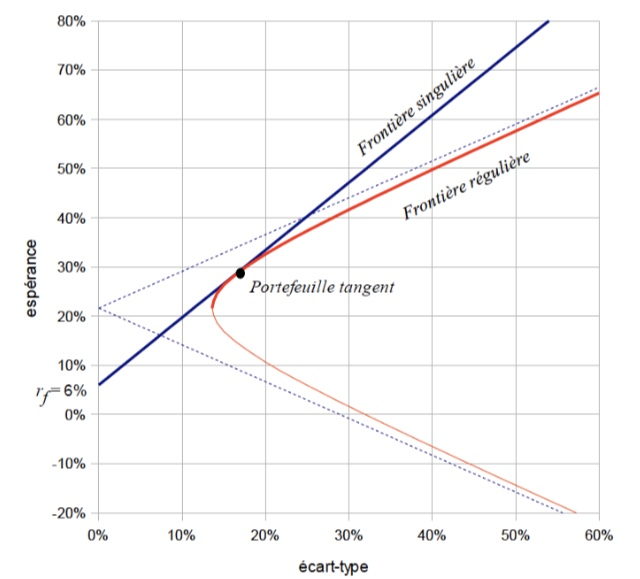

In [3]:
from IPython.display import Image
Image("Markowitz.jpg")

The theory allows to draw an "efficient frontier" of the optimal portfolios drew in bold and red on the graph above. We can see that, for a given $R_0$ (the return of the risk free asset $A_0$) which is defined as $r_f$ on the graph, there exists only one optimal Markowitz portfolio which minimizes the variance for the given curve representing the expected return as a function of the variance.

This optimal portfolio is the one at the intersection between the path of expected returns and the efficient frontier.

It is this portfolio the investor should be interested in.

**Question 10** *Compare the mirror descent and the projected gradient descent
over the simplex from a numerical point of view with a large number p of
assets in a porfolio with the Markowitz model with correlated and uncorrelated
framework.*

# NEED ANSWER

**Question 11** *Would it be possible to handle the mirror descent with a stochastic optimzation algorithm ? If yes, try it on the Markowitz model !*

If this is the question, then the answer should be yes !

Intuitively the purpose is to minimize the efficient frontier function minus the expected returns path. This function to minimize is convex as we can see with the graph so that nothing prevent us to apply a mirror descent to find the minimum.